<div style="text-align: center;">
    <h1 style="font-size:50px">Iris Flower Classification Project</h1>
</div>

<h1>Objective</h1>

<p style="font-size:15px;line-height: 1.5;">The objective of this project is to develop machine learning models that can accurately classify iris flowers into one of three species based on their sepal and petal measurements. The three species in the Iris dataset are:</p>

<ul style="font-size:15px;line-height: 1.5;">
    <li>Iris-setosa</li>
    <li>Iris-versicolor</li>
    <li>Iris-virginica</li>
</ul>

<div style="text-align:center">
    <img src="images/p1.jpeg" alt="Iris Flowers" style="width: 500px;"/>
</div>

<p style="font-size:15px">Among them, Iris-setosa has the smallest size while Iris-virginica has the largest size</p>

<h1>Dataset</h1>

<p style="font-size:15px;line-height: 1.5;">The famous Iris dataset has been used for this project. It contains 150 measurements of Iris flowers, 30 from each species</p>

<ul style="font-size:15px;line-height: 1.5;">
    <li><strong>Features</strong>: Sepal length, sepal width, petal length, and petal width.</li>
    <li><strong>Target</strong>: Species of iris flower.</li>
</ul>

<h1>Approach</h1>

<ul style="font-size:15px;line-height: 1.5;">
    <li>First, the dataset is explored to understand its structure.</li>
    <li>Visualization of the dataset is done to show the relation between features and target variables.</li>
    <li>Pre-Processing of dataset is done by splitting it into training and testing sets in 7:3 ratio.</li>
    <li>6 different models are used for classification:
        <ul style="font-size:15px;line-height: 1.5;">
            <li>Logistic Regression</li>
            <li>Gaussian Naive Bayes</li>
            <li>Decision Tree</li>
            <li>Random Forest</li>
            <li>Support Vector Machine</li>
            <li>K-Nearest Neighbors</li>
        </ul>
    </li>
    <li>Each model is saved as a '.pkl' file.</li>
    <li>Users will be prompted to load the model of their choice and enter the corresponding features in an interactive manner to make predictions.</li>
</ul>

# Import The Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load The Dataset

In [2]:
dataset = pd.read_csv('Iris.csv')
dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


# Check For Missing Values

In [3]:
# Check for missing values
print("\nMissing values:")
missing_values = dataset.isnull().sum()
print(missing_values)


Missing values:
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


# Statistics Of Dataset Like Mean, Median, etc.

In [4]:
# Summary statistics
print("\nSummary statistics:")
print(dataset.describe())


Summary statistics:
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


# Number Of Classes

In [5]:
# Class distribution
print("\nClass distribution:")
print(dataset['Species'].value_counts())


Class distribution:
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64


# Visualization Of Dataset

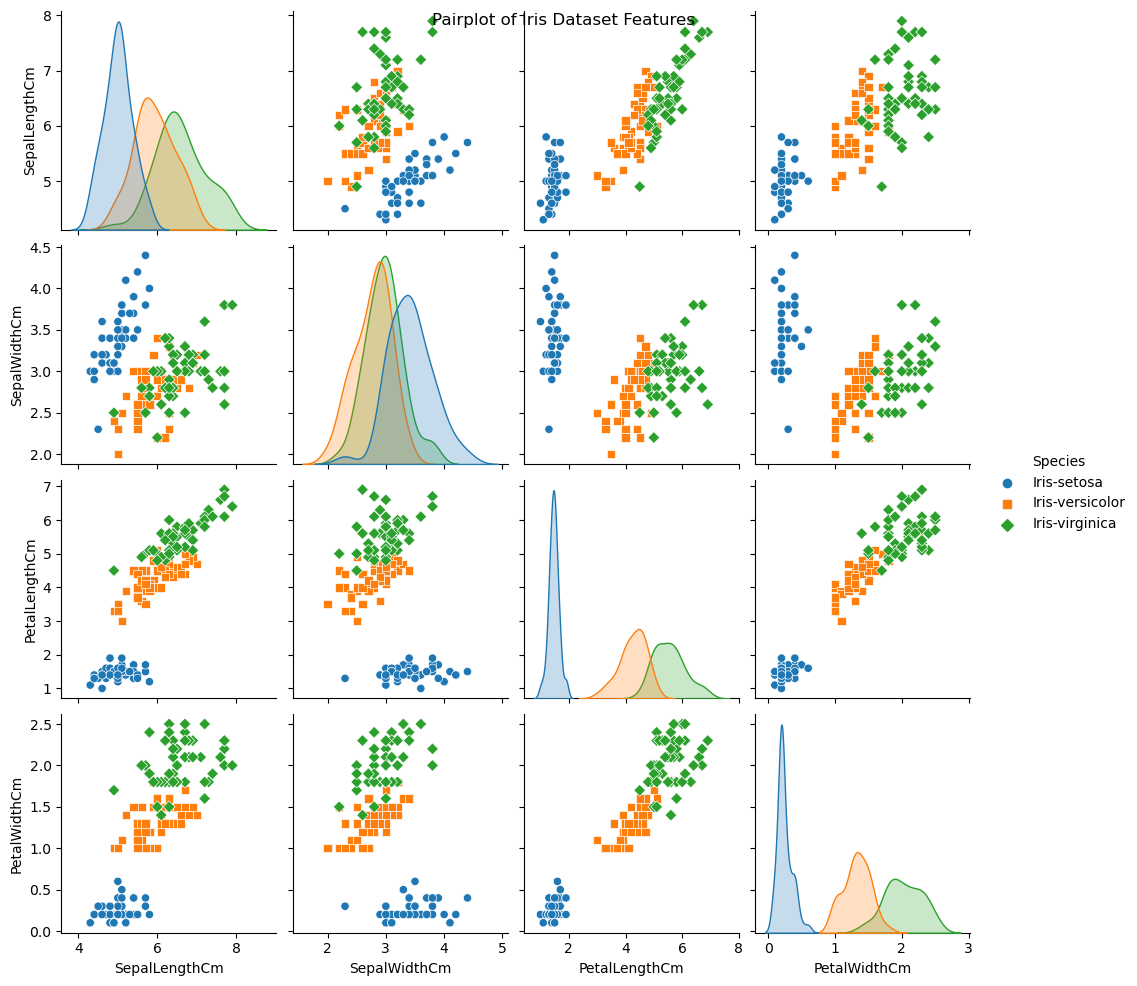

In [6]:
# Pairplot for feature visualization
sns.pairplot(dataset.drop("Id", axis=1), hue="Species", markers=["o", "s", "D"])
plt.suptitle("Pairplot of Iris Dataset Features")
plt.show()

# Import Libraries For Model Training And Testing

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Splitting The Dataset Into Training And Testing Sets

In [8]:
X = dataset.drop(['Id', 'Species'], axis=1) 
y = dataset['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


# Logistic Regression

## Training And Testing The Model

In [9]:
accuracy = {}

model1 = LogisticRegression(max_iter=1000)
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)
acc = model1.score(X_test,y_test)
accuracy['Logistic Regression'] = acc
print(f"Accuracy : {acc}")

print('Classification Report')
print(classification_report(y_test, y_pred))
print()

print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))

Accuracy : 0.9555555555555556
Classification Report
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.90      0.95        21
 Iris-virginica       0.87      1.00      0.93        13

       accuracy                           0.96        45
      macro avg       0.96      0.97      0.96        45
   weighted avg       0.96      0.96      0.96        45


Confusion Matrix
[[11  0  0]
 [ 0 19  2]
 [ 0  0 13]]


## Saving The Model

In [10]:
import joblib
filename = 'logistic_regression_model.pkl'
joblib.dump(model1, filename)
print(f"Model saved as {filename}")

Model saved as logistic_regression_model.pkl


# Gaussian Naive Bayes

## Training And Testing The Model

In [11]:
model2 = GaussianNB()
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)
acc = model2.score(X_test,y_test)
accuracy['Gaussian Naive Bayes'] = acc
print(f"Accuracy : {acc}")

print('Classification Report')
print(classification_report(y_test, y_pred))
print()

print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))

Accuracy : 0.9333333333333333
Classification Report
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.86      0.92        21
 Iris-virginica       0.81      1.00      0.90        13

       accuracy                           0.93        45
      macro avg       0.94      0.95      0.94        45
   weighted avg       0.95      0.93      0.93        45


Confusion Matrix
[[11  0  0]
 [ 0 18  3]
 [ 0  0 13]]


## Saving The Model

In [12]:
filename = 'naive_bayes_model.pkl'
joblib.dump(model2, filename)
print(f"Model saved as {filename}")

Model saved as naive_bayes_model.pkl


# Decision Tree

## Training And Testing The Model

In [13]:
model3 = DecisionTreeClassifier()
model3.fit(X_train, y_train)
y_pred = model3.predict(X_test)
acc = model3.score(X_test,y_test)
accuracy['Decision Tree'] = acc
print(f"Accuracy : {acc}")

print('Classification Report')
print(classification_report(y_test, y_pred))
print()

print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))

Accuracy : 0.9555555555555556
Classification Report
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.90      0.95        21
 Iris-virginica       0.87      1.00      0.93        13

       accuracy                           0.96        45
      macro avg       0.96      0.97      0.96        45
   weighted avg       0.96      0.96      0.96        45


Confusion Matrix
[[11  0  0]
 [ 0 19  2]
 [ 0  0 13]]


## Saving The Model

In [14]:
filename = 'decision_tree_model.pkl'
joblib.dump(model3, filename)
print(f"Model saved as {filename}")

Model saved as decision_tree_model.pkl


# Random Forest

## Training And Testing The Model

In [15]:
model4 = RandomForestClassifier()
model4.fit(X_train, y_train)
y_pred = model4.predict(X_test)
acc = model4.score(X_test,y_test)
accuracy['Random Forest'] = acc
print(f"Accuracy : {acc}")

print('Classification Report')
print(classification_report(y_test, y_pred))
print()

print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))

Accuracy : 0.9111111111111111
Classification Report
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.81      0.89        21
 Iris-virginica       0.76      1.00      0.87        13

       accuracy                           0.91        45
      macro avg       0.92      0.94      0.92        45
   weighted avg       0.93      0.91      0.91        45


Confusion Matrix
[[11  0  0]
 [ 0 17  4]
 [ 0  0 13]]


## Saving The Model

In [16]:
filename = 'random_forest_model.pkl'
joblib.dump(model4, filename)
print(f"Model saved as {filename}")

Model saved as random_forest_model.pkl


# Support Vector Machine

## Training And Testing The Model

In [17]:
model5 = SVC()
model5.fit(X_train, y_train)
y_pred = model5.predict(X_test)
acc = model5.score(X_test,y_test)
accuracy['Support Vector Machine'] = acc
print(f"Accuracy : {acc}")

print('Classification Report')
print(classification_report(y_test, y_pred))
print()

print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))

Accuracy : 0.9333333333333333
Classification Report
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.86      0.92        21
 Iris-virginica       0.81      1.00      0.90        13

       accuracy                           0.93        45
      macro avg       0.94      0.95      0.94        45
   weighted avg       0.95      0.93      0.93        45


Confusion Matrix
[[11  0  0]
 [ 0 18  3]
 [ 0  0 13]]


## Saving The Model

In [18]:
filename = 'svm_model.pkl'
joblib.dump(model5, filename)
print(f"Model saved as {filename}")

Model saved as svm_model.pkl


# K-Nearest Neighbors

## Training And Testing The Model

In [19]:
model6 = KNeighborsClassifier()
model6.fit(X_train, y_train)
y_pred = model6.predict(X_test)
acc = model6.score(X_test,y_test)
accuracy['K-Nearest Neighbors'] = acc
print(f"Accuracy : {acc}")

print('Classification Report')
print(classification_report(y_test, y_pred))
print()

print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))

Accuracy : 0.9333333333333333
Classification Report
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.86      0.92        21
 Iris-virginica       0.81      1.00      0.90        13

       accuracy                           0.93        45
      macro avg       0.94      0.95      0.94        45
   weighted avg       0.95      0.93      0.93        45


Confusion Matrix
[[11  0  0]
 [ 0 18  3]
 [ 0  0 13]]


## Saving The Model

In [20]:
filename = 'knn_model.pkl'
joblib.dump(model6, filename)
print(f"Model saved as {filename}")

Model saved as knn_model.pkl


# Accuracies Of Different Models

In [21]:
for name, acc in accuracy.items():
    print(f"{name}: Accuracy = {acc*100:.2f}%")

Logistic Regression: Accuracy = 95.56%
Gaussian Naive Bayes: Accuracy = 93.33%
Decision Tree: Accuracy = 95.56%
Random Forest: Accuracy = 91.11%
Support Vector Machine: Accuracy = 93.33%
K-Nearest Neighbors: Accuracy = 93.33%


# Taking User Input And Making Predictions

In [3]:
import warnings
import pandas as pd
import joblib

warnings.filterwarnings("ignore")

# Dictionary mapping model names to their filenames
model_files = {
    'Logistic Regression': 'logistic_regression_model.pkl',
    'Naive Bayes': 'naive_bayes_model.pkl',
    'Decision Tree': 'decision_tree_model.pkl',
    'Random Forest': 'random_forest_model.pkl',
    'Support Vector Machine': 'svm_model.pkl',
    'K-Nearest Neighbors': 'knn_model.pkl'
}

# Function to let user choose a model
def choose_model():
    print("Choose a model to load:")
    for idx, model_name in enumerate(model_files.keys(), 1):
        print(f"{idx}. {model_name}")
    while True:
        try:
            choice = int(input("Enter your choice (1-6): "))
            if choice < 1 or choice > 6:
                raise ValueError("Please enter a number between 1 and 6.")
            break
        except ValueError as e:
            print(e)
    selected_model_name = list(model_files.keys())[choice - 1]
    selected_model_file = model_files[selected_model_name]
    return selected_model_name, selected_model_file

# Load the selected model
def load_selected_model(selected_model_file):
    # Load the selected model from the file
    loaded_model = joblib.load(selected_model_file)
    return loaded_model

# Function to get user input for sepal length, sepal width, petal length, and petal width
def get_user_input():
    sepal_length = float(input("Enter sepal length (cm): "))
    sepal_width = float(input("Enter sepal width (cm): "))
    petal_length = float(input("Enter petal length (cm): "))
    petal_width = float(input("Enter petal width (cm): "))
    # Create a DataFrame from the user input
    user_input_df = pd.DataFrame([[sepal_length, sepal_width, petal_length, petal_width]], columns=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])
    return user_input_df

def make_prediction(loaded_model, selected_model_name):
    # Get user input
    user_input_df = get_user_input()
    # Predict the class of the input data using the loaded model
    predicted_class = loaded_model.predict(user_input_df)
    # Print the predicted class
    print(f"The predicted class for the given input using {selected_model_name} is: {predicted_class[0]}")

# For the first time, load the selected model outside the loop
selected_model_name, selected_model_file = choose_model()
loaded_model = load_selected_model(selected_model_file)

while True:
    make_prediction(loaded_model, selected_model_name)
    while True:
        yes_or_no = input("Do you want to quit? (yes/no) ").lower()
        
        if yes_or_no == 'yes':
            break
        elif yes_or_no == 'no':
            while True:
                continue_or_change = input("Do you want to continue with the same model or choose a different model? (continue/change): ").lower()

                if continue_or_change == 'change':
                    print()
                    selected_model_name, selected_model_file = choose_model()
                    loaded_model = load_selected_model(selected_model_file)
                    break
                elif continue_or_change == 'continue':
                    break
                else:
                    print("Please enter either 'continue' or 'change'.")
            break
        else:
            print("Please enter either 'yes' or 'no'.")
    if yes_or_no == 'yes':
        break

Choose a model to load:
1. Logistic Regression
2. Naive Bayes
3. Decision Tree
4. Random Forest
5. Support Vector Machine
6. K-Nearest Neighbors
Enter your choice (1-6): 1
Enter sepal length (cm): 5
Enter sepal width (cm): 3
Enter petal length (cm): 1.6
Enter petal width (cm): 0.2
The predicted class for the given input using Logistic Regression is: Iris-setosa
Do you want to quit? (yes/no) no
Do you want to continue with the same model or choose a different model? (continue/change): change

Choose a model to load:
1. Logistic Regression
2. Naive Bayes
3. Decision Tree
4. Random Forest
5. Support Vector Machine
6. K-Nearest Neighbors
Enter your choice (1-6): 4
Enter sepal length (cm): 5.7
Enter sepal width (cm): 2.8
Enter petal length (cm): 4.5
Enter petal width (cm): 1.3
The predicted class for the given input using Random Forest is: Iris-versicolor
Do you want to quit? (yes/no) no
Do you want to continue with the same model or choose a different model? (continue/change): change

Choo